In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer

In [4]:
hpp_df = pd.read_csv(r'C:\Users\Rekha\Desktop\Dissertation Datasets\House_Price.csv')
hpp_df.head()

,Transaction_date,Price_Paid,Address,Town/City,Postcode,Property_Type,Old/New,Freehold/Leasehold,District,County,Building_num,Floor_Area,Habitable_Rooms,Energy_Rating
0,25-08-2020,780000,1 & 4 Haw Cote,Huddersfield,HD7 5XD,D,N,F,Kirklees,West Yorkshire,3367232578,196,7.0,D
1,27-10-2022,125000,1 16Th Avenue,Hull,HU6 9JJ,S,N,F,City Of Kingston Upon Hull,City Of Kingston Upon Hull,8446903178,73,5.0,D
2,06-12-2022,115000,1 1St Avenue,Hull,HU6 9NE,S,N,F,City Of Kingston Upon Hull,City Of Kingston Upon Hull,10002965934,75,5.0,D
3,18-12-2020,70000,1 23Rd Avenue,Hull,HU6 8HP,S,N,F,City Of Kingston Upon Hull,City Of Kingston Upon Hull,9668157678,57,4.0,D
4,19-04-2022,100000,1 26Th Avenue,Hull,HU6 9SH,S,N,F,City Of Kingston Upon Hull,City Of Kingston Upon Hull,10001727195,74,4.0,D


In [5]:
hpp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609329 entries, 0 to 609328
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction_date    609329 non-null  object 
 1   Price_Paid          609329 non-null  int64  
 2   Address             609329 non-null  object 
 3   Town/City           609329 non-null  object 
 4   Postcode            609329 non-null  object 
 5   Property_Type       609329 non-null  object 
 6   Old/New             609329 non-null  object 
 7   Freehold/Leasehold  609329 non-null  object 
 8   District            609329 non-null  object 
 9   County              609329 non-null  object 
 10  Building_num        609329 non-null  int64  
 11  Floor_Area          609329 non-null  int64  
 12  Habitable_Rooms     527186 non-null  float64
 13  Energy_Rating       609329 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 65.1+ MB


In [6]:
hpp_df.shape

(609329, 14)

In [7]:
hpp_df.isnull().sum()

Transaction_date          0
Price_Paid                0
Address                   0
Town/City                 0
Postcode                  0
Property_Type             0
Old/New                   0
Freehold/Leasehold        0
District                  0
County                    0
Building_num              0
Floor_Area                0
Habitable_Rooms       82143
Energy_Rating             0
dtype: int64

In [8]:
#drop the null values from Habitable rooms
hpp_df.dropna(subset=['Habitable_Rooms'], inplace=True)

In [9]:
# Convert 'Transaction_date' to datetime for time-based analysis
hpp_df['Transaction_date'] = pd.to_datetime(hpp_df['Transaction_date'])

# Convert 'Habitable_Rooms' to integer for meaningful analysis
hpp_df['Habitable_Rooms'] = hpp_df['Habitable_Rooms'].round().astype('Int64')

# Extract year and month from 'Transaction_date'
hpp_df['Year'] = hpp_df['Transaction_date'].dt.year
hpp_df['Month'] = hpp_df['Transaction_date'].dt.month

# Drop rows with missing 'Habitable_Rooms' values
hpp_df.dropna(subset=['Habitable_Rooms'], inplace=True)

# Replace empty strings with NaN for consistent data handling
hpp_df.replace('', np.nan, inplace=True)

In [10]:
hpp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527186 entries, 0 to 609328
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_date    527186 non-null  datetime64[ns]
 1   Price_Paid          527186 non-null  int64         
 2   Address             527186 non-null  object        
 3   Town/City           527186 non-null  object        
 4   Postcode            527186 non-null  object        
 5   Property_Type       527186 non-null  object        
 6   Old/New             527186 non-null  object        
 7   Freehold/Leasehold  527186 non-null  object        
 8   District            527186 non-null  object        
 9   County              527186 non-null  object        
 10  Building_num        527186 non-null  int64         
 11  Floor_Area          527186 non-null  int64         
 12  Habitable_Rooms     527186 non-null  Int64         
 13  Energy_Rating       527186 no

In [11]:
hpp_df['County'].unique()

array(['West Yorkshire', 'City Of Kingston Upon Hull', 'South Yorkshire',
       'North Lincolnshire', 'North East Lincolnshire', 'York',
       'East Riding Of Yorkshire', 'North Yorkshire', 'Lincolnshire'],
      dtype=object)

In [12]:
hpp_df['Property_Type'].unique()

array(['D', 'S', 'T', 'F', 'B', 'M'], dtype=object)

In [13]:
# Drop rows where 'Property_Type' is 'O'
hpp_df = hpp_df.loc[hpp_df['Property_Type'] != 'O']

In [14]:
hpp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527186 entries, 0 to 609328
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_date    527186 non-null  datetime64[ns]
 1   Price_Paid          527186 non-null  int64         
 2   Address             527186 non-null  object        
 3   Town/City           527186 non-null  object        
 4   Postcode            527186 non-null  object        
 5   Property_Type       527186 non-null  object        
 6   Old/New             527186 non-null  object        
 7   Freehold/Leasehold  527186 non-null  object        
 8   District            527186 non-null  object        
 9   County              527186 non-null  object        
 10  Building_num        527186 non-null  int64         
 11  Floor_Area          527186 non-null  int64         
 12  Habitable_Rooms     527186 non-null  Int64         
 13  Energy_Rating       527186 no

In [15]:
hpp_df.shape

(527186, 16)

In [16]:
hpp_df['County'].unique()

array(['West Yorkshire', 'City Of Kingston Upon Hull', 'South Yorkshire',
       'North Lincolnshire', 'North East Lincolnshire', 'York',
       'East Riding Of Yorkshire', 'North Yorkshire', 'Lincolnshire'],
      dtype=object)

In [17]:
#Average property price per year
hpp_df.groupby('Year')['Price_Paid'].mean().round(2)

Year
2013    137833.22
2014    144823.14
2015    150721.26
2016    158004.11
2017    163833.56
2018    167674.55
2019    170877.30
2020    183181.52
2021    198566.84
2022    212841.65
2023    201955.67
Name: Price_Paid, dtype: float64

In [18]:
#find minimun price per year
hpp_df.groupby('Year')['Price_Paid'].min()

Year
2013    3000
2014    5300
2015     250
2016     105
2017     480
2018     400
2019     125
2020     175
2021     155
2022    3000
2023    4400
Name: Price_Paid, dtype: int64

In [19]:
#find maximum price per year
hpp_df.groupby('Year')['Price_Paid'].max()

Year
2013     1999999
2014     3902021
2015     2850000
2016    17164424
2017    11450000
2018     1797000
2019     2450000
2020     8826063
2021     9345000
2022    60945000
2023     3000000
Name: Price_Paid, dtype: int64

In [20]:
# Calculate basic statistics for numeric attributes
# Provides insights into the central tendency and spread of numeric features

numeric_attributes = ['Price_Paid', 'Floor_Area', 'Habitable_Rooms']
numeric_stats = hpp_df[numeric_attributes].describe()

# Calculate unique value counts and percentages for categorical attributes
# Offers a snapshot of the distribution of categorical variables
categorical_attributes = ['Property_Type', 'Energy_Rating', 'Old/New', 'Freehold/Leasehold']
categorical_counts = {}
for column in categorical_attributes:
    counts = hpp_df[column].value_counts()
    percentages = (counts / counts.sum()) * 100
    categorical_counts[column] = pd.DataFrame({'Counts': counts, 'Percentages': percentages})

print(numeric_stats)
for column, counts_df in categorical_counts.items():
    print(f"\nCounts and Percentages for {column}:")
    print(counts_df)

         Price_Paid     Floor_Area  Habitable_Rooms
count  5.271860e+05  527186.000000    527186.000000
mean   1.726033e+05      91.500876         4.721956
std    2.410441e+05      44.820158         1.466693
min    1.050000e+02       4.000000         1.000000
25%    9.999500e+04      69.000000         4.000000
50%    1.420000e+05      83.000000         5.000000
75%    2.080000e+05     102.000000         5.000000
max    6.094500e+07    5507.000000        91.000000

Counts and Percentages for Property_Type:
   Counts  Percentages
S  200676    38.065502
T  197115    37.390029
D  102665    19.474151
F   26110     4.952711
B     498     0.094464
M     122     0.023142

Counts and Percentages for Energy_Rating:
   Counts  Percentages
D  282169    53.523614
C  126505    23.996275
E   92426    17.531953
F   15405     2.922119
B    5353     1.015391
G    5106     0.968539
A     222     0.042110

Counts and Percentages for Old/New:
   Counts  Percentages
N  525637    99.706176
Y    1549     0.29

Property_Type           B          D          F            M         S  \
Year                                                                     
2013                  NaN        NaN        NaN          NaN       NaN   
2014            98.795181   6.577853   8.059420          NaN  3.099691   
2015             4.002727   3.980451  -1.959057   -35.703041  3.709728   
2016           221.383169   4.187452   7.380151    22.398552  4.099474   
2017           -74.895377   4.424957  21.115493   -35.121900  3.607599   
2018             2.032269   3.671127 -10.371014    70.823885  3.541578   
2019            -6.531447   1.416886   3.996623   -49.963174  2.608818   
2020            39.322878   6.680568  19.805366    55.294115  5.853784   
2021           -20.018336  10.254637 -12.165994   -11.888708  8.294845   
2022            17.455833   7.124736  81.632978  2143.524281  7.892127   
2023            -4.568115   2.933018 -42.333538   -95.353330 -0.859133   

Property_Type          T  
Year      

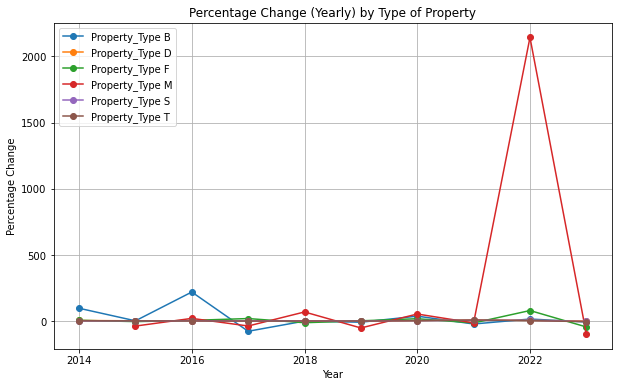

In [21]:
# Calculate Percentage Change (Yearly) by Type of Property
hpp_df['Year'] = pd.to_datetime(hpp_df['Transaction_date']).dt.year
property_type_changes = hpp_df.groupby(['Year', 'Property_Type'])['Price_Paid'].mean().unstack()
property_type_changes = property_type_changes.pct_change() * 100

# Print the results
print(property_type_changes)

# Plotting
plt.figure(figsize=(10, 6))

for prop_type in property_type_changes.columns:
    plt.plot(property_type_changes.index, property_type_changes[prop_type], marker='o', label=f'Property_Type {prop_type}')

plt.title('Percentage Change (Yearly) by Type of Property')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.show()


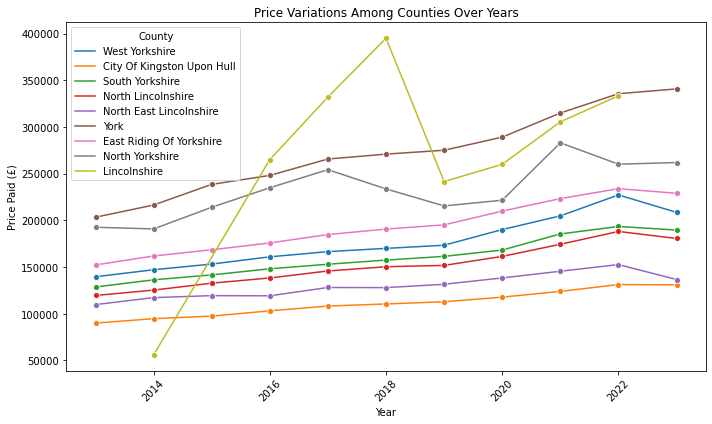

In [22]:
# Visualize the distribution of house prices over years based on counties to gains an understanding of the overall trend in house prices


plt.figure(figsize=(10, 6))
sns.lineplot(data=hpp_df, x='Year', y='Price_Paid', hue='County', marker='o', ci=None)
plt.title('Price Variations Among Counties Over Years')
plt.xlabel('Year')
plt.ylabel('Price Paid (£)')
plt.legend(title='County', loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Plot Data Table:
                       County  \
0              West Yorkshire   
1  City Of Kingston Upon Hull   
2             South Yorkshire   
3          North Lincolnshire   
4     North East Lincolnshire   
5                        York   
6    East Riding Of Yorkshire   
7             North Yorkshire   
8                Lincolnshire   

                                                Year  \
0                     [0.75, 1.25, 1.25, 0.75, 0.75]   
1                                         [1.0, 1.0]   
2                                         [1.0, 1.0]   
3                                     [0.875, 1.125]   
4                                     [0.875, 1.125]   
5                                       [0.75, 1.25]   
6  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
7                     [1.75, 2.25, 2.25, 1.75, 1.75]   
8                                         [2.0, 2.0]   

                                          Price_Paid  
0    [83000.0, 83000.0, 349462.5, 34

<Figure size 720x432 with 0 Axes>

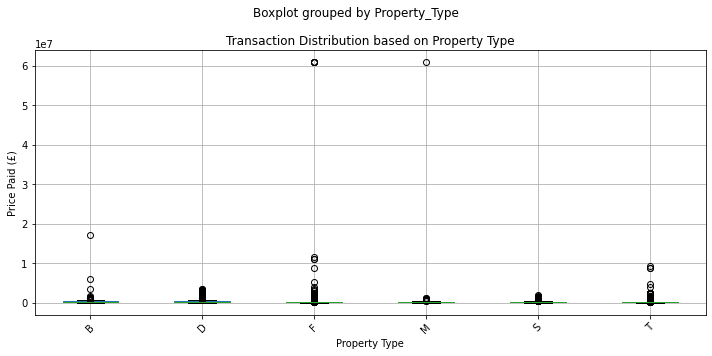

In [23]:
#Transaction Distribution by Property Type
plt.figure(figsize=(10, 6))
ax = hpp_df.boxplot(column='Price_Paid', by='Property_Type', figsize=(10, 5))
plt.title('Transaction Distribution based on Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price Paid (£)')
plt.xticks(rotation=45)
plt.tight_layout()


# Extract data from the plot
plot_data = []
for line, county in zip(ax.lines, hpp_df['County'].unique()):
    xdata, ydata = line.get_data()
    plot_data.append({'County': county, 'Year': xdata, 'Price_Paid': ydata})

# Create a DataFrame from the plot data
plot_df = pd.DataFrame(plot_data)

# Display the plot DataFrame
print("Plot Data Table:")
print(plot_df)

plt.show()

In [24]:
#Median Price for Counties Over Time

median_prices = hpp_df.groupby(['Year', 'County'])['Price_Paid'].median().reset_index()
pivot_table = median_prices.pivot(index='Year', columns='County', values='Price_Paid')
pivot_table

County,City Of Kingston Upon Hull,East Riding Of Yorkshire,Lincolnshire,North East Lincolnshire,North Lincolnshire,North Yorkshire,South Yorkshire,West Yorkshire,York
Year,,,,,,,,,
2013,82950.0,134000.0,NaN,98000.0,106750.0,170000.0,110000.0,120000.0,180000.0
2014,87950.0,142000.0,56000.0,107500.0,114300.0,172000.0,117000.0,124950.0,192000.0
2015,90000.0,148625.0,NaN,110000.0,120000.0,178975.0,120000.0,129000.0,215000.0
2016,94000.0,152500.0,277475.0,112000.0,122000.0,190000.0,123500.0,135000.0,220000.0
2017,98000.0,160000.0,325000.0,118000.0,127000.0,210000.0,126000.0,137500.0,231000.0
2018,102000.0,163000.0,394950.0,115000.0,130000.0,200000.0,130000.0,142000.0,238000.0
2019,102500.0,170000.0,241500.0,120000.0,133000.0,196250.0,133000.0,146000.0,245000.0
2020,107000.0,179950.0,260000.0,123000.0,138250.0,202970.0,140000.0,155000.0,250000.0
2021,114000.0,190000.0,319000.0,130000.0,150000.0,229000.0,150000.0,168000.0,275000.0


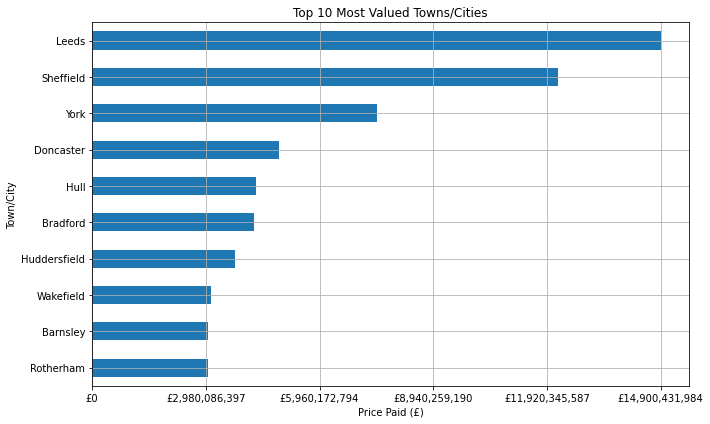

In [25]:
#Top 10 values towns in this region

town_city_pp = hpp_df.groupby('Town/City')['Price_Paid'].sum()
top_10_towns = town_city_pp.sort_values(ascending=False).head(10)

# Create the bar chart
ax = top_10_towns.sort_values(ascending=True).plot(kind='barh', grid=True, figsize=(10, 6))

# Customize the X-axis ticks and labels
tick_values = np.linspace(0, top_10_towns.max(), 6)  # Adjust the number of ticks as needed
tick_labels = ['£{:,.0f}'.format(x) for x in tick_values]

ax.set_xticks(tick_values)
ax.set_xticklabels(tick_labels)

plt.title('Top 10 Most Valued Towns/Cities')
plt.xlabel('Price Paid (£)')
plt.ylabel('Town/City')
plt.tight_layout()
plt.show()

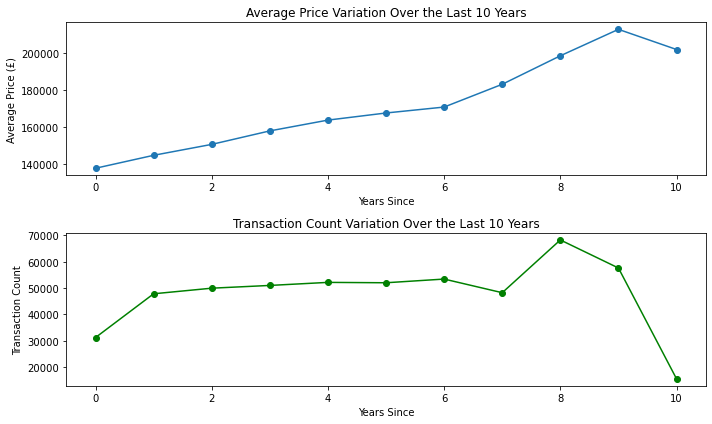

In [26]:
plt.figure(figsize=(10, 6))

# Calculate the difference between the current year and the transaction year
hpp_df['Years_Since'] = 2023 - hpp_df['Year']

# Filter data for transactions in the last 10 years
last_10_years = hpp_df[hpp_df['Years_Since'] <= 10]

# Group data by 'Years_Since' and calculate mean price and transaction count for each year
yearly_stats = last_10_years.groupby('Years_Since').agg({'Price_Paid': 'mean', 'Transaction_date': 'count'})

# Reset index for plotting
yearly_stats = yearly_stats.reset_index()

# Invert the x-axis values
yearly_stats['Years_Since'] = 10 - yearly_stats['Years_Since']

# Line plot for mean price
plt.subplot(2, 1, 1)
plt.plot(yearly_stats['Years_Since'], yearly_stats['Price_Paid'], marker='o')
plt.title('Average Price Variation Over the Last 10 Years')
plt.xlabel('Years Since')
plt.ylabel('Average Price (£)')

# Line plot for transaction count
plt.subplot(2, 1, 2)
plt.plot(yearly_stats['Years_Since'], yearly_stats['Transaction_date'], marker='o', color='green')
plt.title('Transaction Count Variation Over the Last 10 Years')
plt.xlabel('Years Since')
plt.ylabel('Transaction Count')
plt.tight_layout()
plt.show()

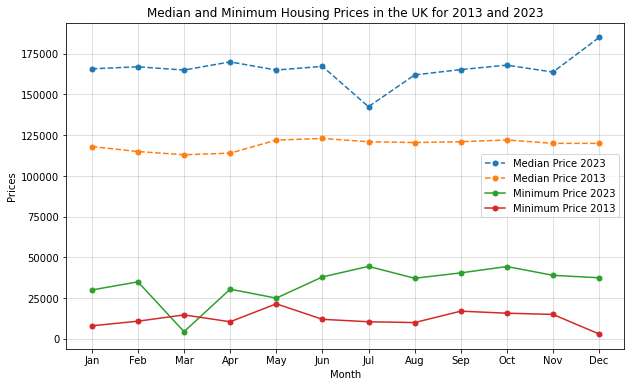

In [27]:
# Filter the data for the years 2013 and 2023
hpp_df_2013 = hpp_df[hpp_df['Year'] == 2013].copy()
hpp_df_2023 = hpp_df[hpp_df['Year'] == 2023].copy()

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot median prices for 2023 and 2013
ax.plot(hpp_df_2023.groupby('Month')['Price_Paid'].median(), 
        label='Median Price 2023', linestyle='dashed', marker='o', markersize=5)

ax.plot(hpp_df_2013.groupby('Month')['Price_Paid'].median(), 
        label='Median Price 2013', linestyle='dashed', marker='o', markersize=5)

# Plot minimum prices for 2023 and 2013
ax.plot(hpp_df_2023.groupby('Month')['Price_Paid'].min(), 
        label='Minimum Price 2023', marker='o', markersize=5)

ax.plot(hpp_df_2013.groupby('Month')['Price_Paid'].min(), 
        label='Minimum Price 2013', marker='o', markersize=5)

# Set labels and title
ax.set(xlabel='Month', ylabel='Prices', 
       title="Median and Minimum Housing Prices in the UK for 2013 and 2023")

# Add a legend
ax.legend()

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Display grid lines
plt.grid(True, alpha=0.5)

# Show the plot
plt.show()

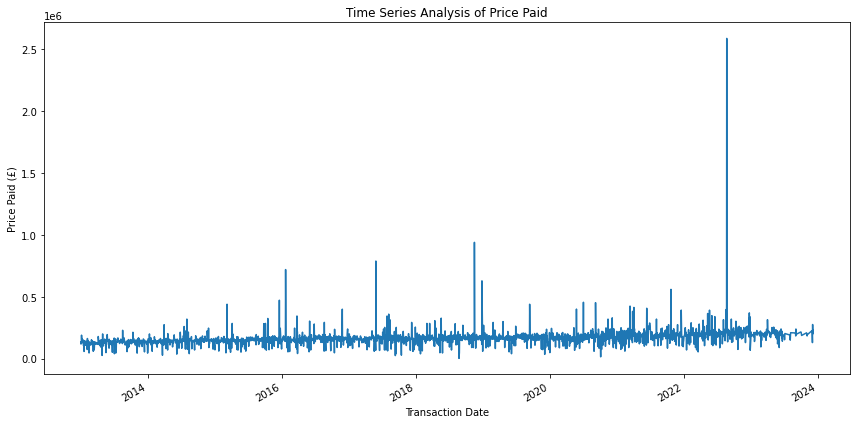

In [28]:
# Time series analysis for price paid
time_series = hpp_df.groupby('Transaction_date')['Price_Paid'].mean()
plt.figure(figsize=(12, 6))
time_series.plot()
plt.title('Time Series Analysis of Price Paid')
plt.xlabel('Transaction Date')
plt.ylabel('Price Paid (£)')
plt.tight_layout()
plt.show()

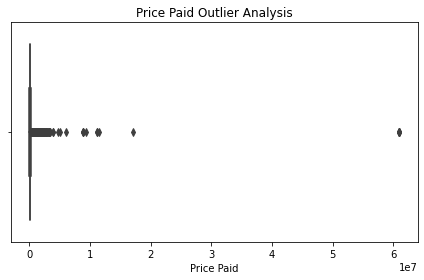

In [29]:
# Box plot for outlier detection
sns.boxplot(data=hpp_df, x='Price_Paid')
plt.title('Price Paid Outlier Analysis')
plt.xlabel('Price Paid')
plt.tight_layout()
plt.show()

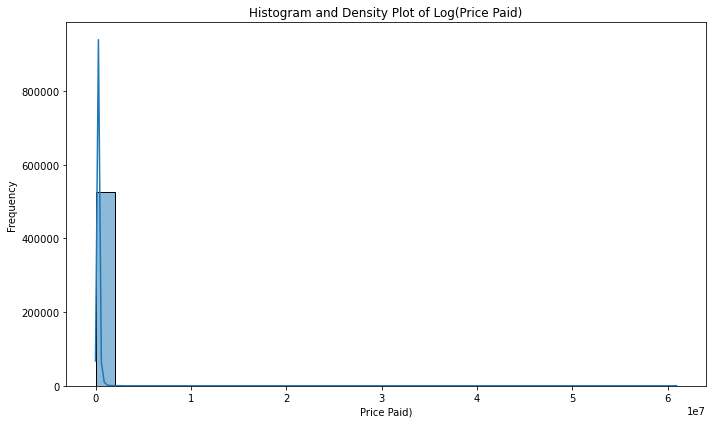

In [30]:
# Distribution of data before log-transformation
plt.figure(figsize=(10, 6))
sns.histplot(data=hpp_df, x='Price_Paid', bins=30, kde=True)
plt.title('Histogram and Density Plot of Log(Price Paid)')
plt.xlabel('Price Paid)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [31]:
hp_df = hpp_df.copy()

In [32]:
hp_df.count()

Transaction_date      527186
Price_Paid            527186
Address               527186
Town/City             527186
Postcode              527186
Property_Type         527186
Old/New               527186
Freehold/Leasehold    527186
District              527186
County                527186
Building_num          527186
Floor_Area            527186
Habitable_Rooms       527186
Energy_Rating         527186
Year                  527186
Month                 527186
Years_Since           527186
dtype: int64

In [33]:
Property_types = ("T", "S", "D", "F", "M", "B")
prop_df = pd.DataFrame(hpp_df, columns = ['Property_Type'])
dummy_df = pd.get_dummies(hpp_df, columns = ['Property_Type'])
hpp_df = prop_df.join(dummy_df)
hpp_df.drop(columns = 'Property_Type', axis = 1, inplace = True)
hpp_df

,Transaction_date,Price_Paid,Address,Town/City,Postcode,Old/New,Freehold/Leasehold,District,County,Building_num,...,Energy_Rating,Year,Month,Years_Since,Property_Type_B,Property_Type_D,Property_Type_F,Property_Type_M,Property_Type_S,Property_Type_T
0,2020-08-25,780000,1 & 4 Haw Cote,Huddersfield,HD7 5XD,N,F,Kirklees,West Yorkshire,3367232578,...,D,2020,8,3,0,1,0,0,0,0
1,2022-10-27,125000,1 16Th Avenue,Hull,HU6 9JJ,N,F,City Of Kingston Upon Hull,City Of Kingston Upon Hull,8446903178,...,D,2022,10,1,0,0,0,0,1,0
2,2022-06-12,115000,1 1St Avenue,Hull,HU6 9NE,N,F,City Of Kingston Upon Hull,City Of Kingston Upon Hull,10002965934,...,D,2022,6,1,0,0,0,0,1,0
3,2020-12-18,70000,1 23Rd Avenue,Hull,HU6 8HP,N,F,City Of Kingston Upon Hull,City Of Kingston Upon Hull,9668157678,...,D,2020,12,3,0,0,0,0,1,0
4,2022-04-19,100000,1 26Th Avenue,Hull,HU6 9SH,N,F,City Of Kingston Upon Hull,City Of Kingston Upon Hull,10001727195,...,D,2022,4,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609323,2021-06-29,445000,Zenith Doncaster Road,Doncaster,DN5 7EF,N,F,Doncaster,South Yorkshire,10000567415,...,D,2021,6,2,0,1,0,0,0,0
609324,2014-10-15,999999,Zero House Greencliffe Drive,York,YO30 6NA,N,F,York,York,10002473461,...,C,2014,10,9,0,1,0,0,0,0
609325,2016-07-03,955000,Zero House Greencliffe Drive,York,YO30 6NA,N,F,York,York,10002473461,...,C,2016,7,7,0,1,0,0,0,0
609326,2022-12-07,1693460,Zero House Greencliffe Drive,York,YO30 6NA,N,F,York,York,10002473461,...,C,2022,12,1,0,1,0,0,0,0


In [34]:
# Create a label encoder instance
label_encoder = LabelEncoder()

# Apply label encoding to 'Old/New'
hpp_df['Old/New'] = label_encoder.fit_transform(hpp_df['Old/New'])

print("Encoded values for 'Old/New':", label_encoder.classes_)

# Display the first few rows of the DataFrame
hpp_df.head()

Encoded values for 'Old/New': ['N' 'Y']


,Transaction_date,Price_Paid,Address,Town/City,Postcode,Old/New,Freehold/Leasehold,District,County,Building_num,...,Energy_Rating,Year,Month,Years_Since,Property_Type_B,Property_Type_D,Property_Type_F,Property_Type_M,Property_Type_S,Property_Type_T
0,2020-08-25,780000,1 & 4 Haw Cote,Huddersfield,HD7 5XD,0,F,Kirklees,West Yorkshire,3367232578,...,D,2020,8,3,0,1,0,0,0,0
1,2022-10-27,125000,1 16Th Avenue,Hull,HU6 9JJ,0,F,City Of Kingston Upon Hull,City Of Kingston Upon Hull,8446903178,...,D,2022,10,1,0,0,0,0,1,0
2,2022-06-12,115000,1 1St Avenue,Hull,HU6 9NE,0,F,City Of Kingston Upon Hull,City Of Kingston Upon Hull,10002965934,...,D,2022,6,1,0,0,0,0,1,0
3,2020-12-18,70000,1 23Rd Avenue,Hull,HU6 8HP,0,F,City Of Kingston Upon Hull,City Of Kingston Upon Hull,9668157678,...,D,2020,12,3,0,0,0,0,1,0
4,2022-04-19,100000,1 26Th Avenue,Hull,HU6 9SH,0,F,City Of Kingston Upon Hull,City Of Kingston Upon Hull,10001727195,...,D,2022,4,1,0,0,0,0,1,0


In [35]:
# Apply label encoding to 'Freehold/Leasehold'
hpp_df['Freehold/Leasehold'] = label_encoder.fit_transform(hpp_df['Freehold/Leasehold'])
# Display the first few rows of the DataFrame
print("Encoded values for 'Freehold/Leasehold':", label_encoder.classes_)
hpp_df.head()

Encoded values for 'Freehold/Leasehold': ['F' 'L']


,Transaction_date,Price_Paid,Address,Town/City,Postcode,Old/New,Freehold/Leasehold,District,County,Building_num,...,Energy_Rating,Year,Month,Years_Since,Property_Type_B,Property_Type_D,Property_Type_F,Property_Type_M,Property_Type_S,Property_Type_T
0,2020-08-25,780000,1 & 4 Haw Cote,Huddersfield,HD7 5XD,0,0,Kirklees,West Yorkshire,3367232578,...,D,2020,8,3,0,1,0,0,0,0
1,2022-10-27,125000,1 16Th Avenue,Hull,HU6 9JJ,0,0,City Of Kingston Upon Hull,City Of Kingston Upon Hull,8446903178,...,D,2022,10,1,0,0,0,0,1,0
2,2022-06-12,115000,1 1St Avenue,Hull,HU6 9NE,0,0,City Of Kingston Upon Hull,City Of Kingston Upon Hull,10002965934,...,D,2022,6,1,0,0,0,0,1,0
3,2020-12-18,70000,1 23Rd Avenue,Hull,HU6 8HP,0,0,City Of Kingston Upon Hull,City Of Kingston Upon Hull,9668157678,...,D,2020,12,3,0,0,0,0,1,0
4,2022-04-19,100000,1 26Th Avenue,Hull,HU6 9SH,0,0,City Of Kingston Upon Hull,City Of Kingston Upon Hull,10001727195,...,D,2022,4,1,0,0,0,0,1,0


In [36]:
Energy_Rating = ('A', 'B', 'C', 'D', 'E', 'F', 'G')
Erating_df = pd.DataFrame(hpp_df, columns = ['Energy_Rating'])
dummyer_df = pd.get_dummies(hpp_df, columns = ['Energy_Rating'])
hpp_df = Erating_df.join(dummyer_df)
hpp_df.drop(columns = 'Energy_Rating', axis = 1, inplace = True)
hpp_df

,Transaction_date,Price_Paid,Address,Town/City,Postcode,Old/New,Freehold/Leasehold,District,County,Building_num,...,Property_Type_M,Property_Type_S,Property_Type_T,Energy_Rating_A,Energy_Rating_B,Energy_Rating_C,Energy_Rating_D,Energy_Rating_E,Energy_Rating_F,Energy_Rating_G
0,2020-08-25,780000,1 & 4 Haw Cote,Huddersfield,HD7 5XD,0,0,Kirklees,West Yorkshire,3367232578,...,0,0,0,0,0,0,1,0,0,0
1,2022-10-27,125000,1 16Th Avenue,Hull,HU6 9JJ,0,0,City Of Kingston Upon Hull,City Of Kingston Upon Hull,8446903178,...,0,1,0,0,0,0,1,0,0,0
2,2022-06-12,115000,1 1St Avenue,Hull,HU6 9NE,0,0,City Of Kingston Upon Hull,City Of Kingston Upon Hull,10002965934,...,0,1,0,0,0,0,1,0,0,0
3,2020-12-18,70000,1 23Rd Avenue,Hull,HU6 8HP,0,0,City Of Kingston Upon Hull,City Of Kingston Upon Hull,9668157678,...,0,1,0,0,0,0,1,0,0,0
4,2022-04-19,100000,1 26Th Avenue,Hull,HU6 9SH,0,0,City Of Kingston Upon Hull,City Of Kingston Upon Hull,10001727195,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609323,2021-06-29,445000,Zenith Doncaster Road,Doncaster,DN5 7EF,0,0,Doncaster,South Yorkshire,10000567415,...,0,0,0,0,0,0,1,0,0,0
609324,2014-10-15,999999,Zero House Greencliffe Drive,York,YO30 6NA,0,0,York,York,10002473461,...,0,0,0,0,0,1,0,0,0,0
609325,2016-07-03,955000,Zero House Greencliffe Drive,York,YO30 6NA,0,0,York,York,10002473461,...,0,0,0,0,0,1,0,0,0,0
609326,2022-12-07,1693460,Zero House Greencliffe Drive,York,YO30 6NA,0,0,York,York,10002473461,...,0,0,0,0,0,1,0,0,0,0


In [37]:
print(hpp_df['Energy_Rating_A'].unique())
print(hpp_df['Energy_Rating_B'].unique())
print(hpp_df['Energy_Rating_C'].unique())
print(hpp_df['Energy_Rating_D'].unique())
print(hpp_df['Energy_Rating_E'].unique())
print(hpp_df['Energy_Rating_F'].unique())
print(hpp_df['Energy_Rating_G'].unique())

[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]


In [38]:
hpp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527186 entries, 0 to 609328
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_date    527186 non-null  datetime64[ns]
 1   Price_Paid          527186 non-null  int64         
 2   Address             527186 non-null  object        
 3   Town/City           527186 non-null  object        
 4   Postcode            527186 non-null  object        
 5   Old/New             527186 non-null  int32         
 6   Freehold/Leasehold  527186 non-null  int32         
 7   District            527186 non-null  object        
 8   County              527186 non-null  object        
 9   Building_num        527186 non-null  int64         
 10  Floor_Area          527186 non-null  int64         
 11  Habitable_Rooms     527186 non-null  Int64         
 12  Year                527186 non-null  int64         
 13  Month               527186 no

In [39]:
hpp_df["Price_Paid"].skew()

184.48063145599673

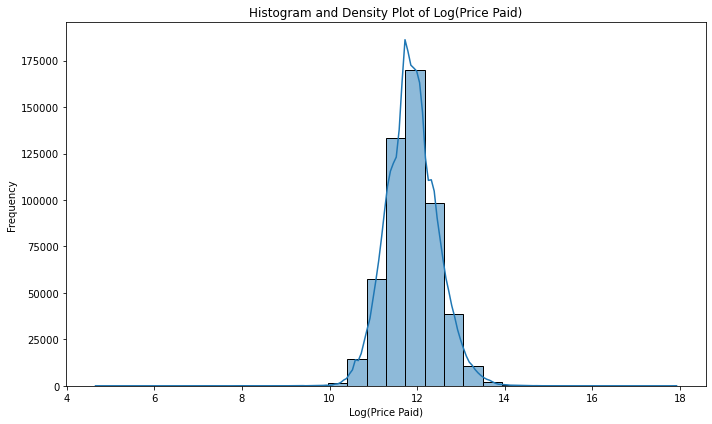

In [40]:
# Applying log-transformation due to outliers (the data is positively skewed)
hpp_df['Log_Price'] = np.log(hpp_df["Price_Paid"])
plt.figure(figsize=(10, 6))
sns.histplot(data=hpp_df, x='Log_Price', bins=30, kde=True)
plt.title('Histogram and Density Plot of Log(Price Paid)')
plt.xlabel('Log(Price Paid)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [41]:
hpp_df["Log_Price"].skew()

0.10323780885731522

In [42]:
#Removing the extreme outliers and saving the result to new dataframe
Q1 = hpp_df['Log_Price'].quantile(0.25)
Q3 = hpp_df['Log_Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
hp_df = hpp_df[(hpp_df['Log_Price'] >= lower_bound) & (hpp_df['Log_Price'] <= upper_bound)]

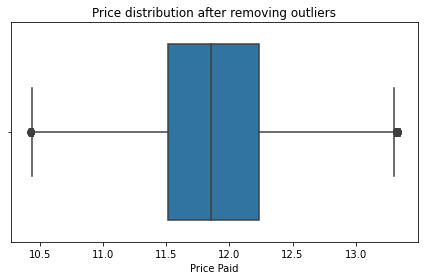

In [43]:
# Box plot for Log_Price
sns.boxplot(data=hp_df, x='Log_Price')
plt.title('Price distribution after removing outliers')
plt.xlabel('Price Paid')
plt.tight_layout()
plt.show()

In [44]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520257 entries, 1 to 609328
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_date    520257 non-null  datetime64[ns]
 1   Price_Paid          520257 non-null  int64         
 2   Address             520257 non-null  object        
 3   Town/City           520257 non-null  object        
 4   Postcode            520257 non-null  object        
 5   Old/New             520257 non-null  int32         
 6   Freehold/Leasehold  520257 non-null  int32         
 7   District            520257 non-null  object        
 8   County              520257 non-null  object        
 9   Building_num        520257 non-null  int64         
 10  Floor_Area          520257 non-null  int64         
 11  Habitable_Rooms     520257 non-null  Int64         
 12  Year                520257 non-null  int64         
 13  Month               520257 no

In [45]:
hp_df['Log_Price'].min()

10.414303176252119

In [46]:
#adding original price to the log price to check the minimum and maximum price range
hp_df['Original_Price'] = np.exp(hp_df['Log_Price'])

min_price = hp_df['Original_Price'].min()
max_price = hp_df['Original_Price'].max()


# Round off the minimum and maximum prices to two decimal places
min_price = round(min_price, 2)
max_price = round(max_price, 2)


print("Min Price:", min_price)
print("Max Price:", max_price)

Min Price: 33333.0
Max Price: 624000.0


<ipython-input-46-fb1db93ecef2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hp_df['Original_Price'] = np.exp(hp_df['Log_Price'])


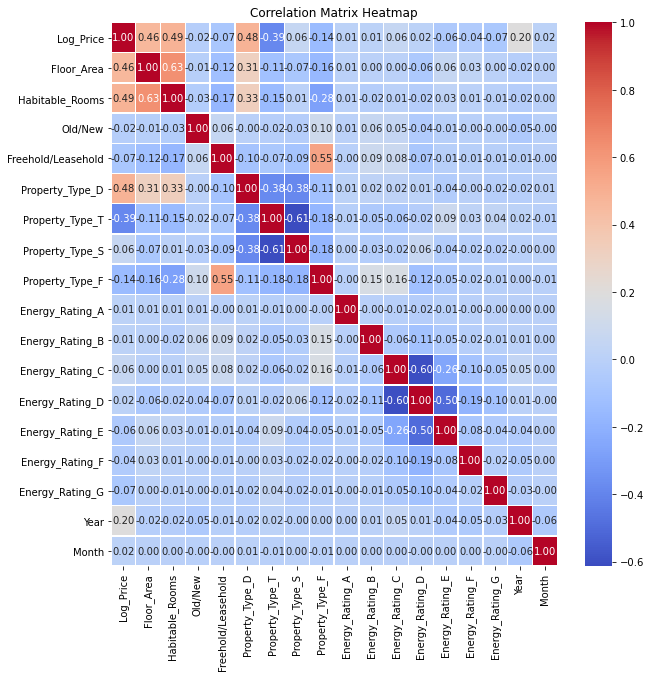

In [47]:
# List of variables you for correlation
selected_vars = ['Log_Price', 'Floor_Area', 'Habitable_Rooms', 'Old/New','Freehold/Leasehold', 'Property_Type_D','Property_Type_T','Property_Type_S', 'Property_Type_F', 'Energy_Rating_A','Energy_Rating_B','Energy_Rating_C','Energy_Rating_D','Energy_Rating_E','Energy_Rating_F','Energy_Rating_G','Year','Month']

# Subset the dataframe with the selected variables
selected_df = hp_df[selected_vars]

# Create a correlation matrix
corr_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [48]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520257 entries, 1 to 609328
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_date    520257 non-null  datetime64[ns]
 1   Price_Paid          520257 non-null  int64         
 2   Address             520257 non-null  object        
 3   Town/City           520257 non-null  object        
 4   Postcode            520257 non-null  object        
 5   Old/New             520257 non-null  int32         
 6   Freehold/Leasehold  520257 non-null  int32         
 7   District            520257 non-null  object        
 8   County              520257 non-null  object        
 9   Building_num        520257 non-null  int64         
 10  Floor_Area          520257 non-null  int64         
 11  Habitable_Rooms     520257 non-null  Int64         
 12  Year                520257 non-null  int64         
 13  Month               520257 no

In [49]:
#preparing data for Prediction model

# Create a new DataFrame and copying the data
linear_df = hp_df.copy()

linear_df.head()

,Transaction_date,Price_Paid,Address,Town/City,Postcode,Old/New,Freehold/Leasehold,District,County,Building_num,...,Property_Type_T,Energy_Rating_A,Energy_Rating_B,Energy_Rating_C,Energy_Rating_D,Energy_Rating_E,Energy_Rating_F,Energy_Rating_G,Log_Price,Original_Price
1,2022-10-27,125000,1 16Th Avenue,Hull,HU6 9JJ,0,0,City Of Kingston Upon Hull,City Of Kingston Upon Hull,8446903178,...,0,0,0,0,1,0,0,0,11.736069,125000.0
2,2022-06-12,115000,1 1St Avenue,Hull,HU6 9NE,0,0,City Of Kingston Upon Hull,City Of Kingston Upon Hull,10002965934,...,0,0,0,0,1,0,0,0,11.652687,115000.0
3,2020-12-18,70000,1 23Rd Avenue,Hull,HU6 8HP,0,0,City Of Kingston Upon Hull,City Of Kingston Upon Hull,9668157678,...,0,0,0,0,1,0,0,0,11.156251,70000.0
4,2022-04-19,100000,1 26Th Avenue,Hull,HU6 9SH,0,0,City Of Kingston Upon Hull,City Of Kingston Upon Hull,10001727195,...,0,0,0,0,1,0,0,0,11.512925,100000.0
5,2015-12-06,76000,1 2Nd Avenue,Hull,HU6 9NT,0,0,City Of Kingston Upon Hull,City Of Kingston Upon Hull,5055999278,...,0,0,0,0,1,0,0,0,11.238489,76000.0


In [50]:
# Drop unnecessary columns
columns_to_drop = ['Address', 'Transaction_date', 'Price_Paid', 'Original_Price', 'Years_Since', 'Building_num']
linear_df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [51]:
linear_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520257 entries, 1 to 609328
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Town/City           520257 non-null  object 
 1   Postcode            520257 non-null  object 
 2   Old/New             520257 non-null  int32  
 3   Freehold/Leasehold  520257 non-null  int32  
 4   District            520257 non-null  object 
 5   County              520257 non-null  object 
 6   Floor_Area          520257 non-null  int64  
 7   Habitable_Rooms     520257 non-null  Int64  
 8   Year                520257 non-null  int64  
 9   Month               520257 non-null  int64  
 10  Property_Type_B     520257 non-null  uint8  
 11  Property_Type_D     520257 non-null  uint8  
 12  Property_Type_F     520257 non-null  uint8  
 13  Property_Type_M     520257 non-null  uint8  
 14  Property_Type_S     520257 non-null  uint8  
 15  Property_Type_T     520257 non-nul

In [52]:
# Factorize the remaining address-related columns
address_columns = ['Town/City', 'District', 'County', 'Postcode']
for col in address_columns:
    linear_df[col] = linear_df[col].factorize()[0].astype('float32')

In [53]:
linear_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520257 entries, 1 to 609328
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Town/City           520257 non-null  float32
 1   Postcode            520257 non-null  float32
 2   Old/New             520257 non-null  int32  
 3   Freehold/Leasehold  520257 non-null  int32  
 4   District            520257 non-null  float32
 5   County              520257 non-null  float32
 6   Floor_Area          520257 non-null  int64  
 7   Habitable_Rooms     520257 non-null  Int64  
 8   Year                520257 non-null  int64  
 9   Month               520257 non-null  int64  
 10  Property_Type_B     520257 non-null  uint8  
 11  Property_Type_D     520257 non-null  uint8  
 12  Property_Type_F     520257 non-null  uint8  
 13  Property_Type_M     520257 non-null  uint8  
 14  Property_Type_S     520257 non-null  uint8  
 15  Property_Type_T     520257 non-nul

In [54]:
linear_df.head()

,Town/City,Postcode,Old/New,Freehold/Leasehold,District,County,Floor_Area,Habitable_Rooms,Year,Month,...,Property_Type_S,Property_Type_T,Energy_Rating_A,Energy_Rating_B,Energy_Rating_C,Energy_Rating_D,Energy_Rating_E,Energy_Rating_F,Energy_Rating_G,Log_Price
1,0.0,0.0,0,0,0.0,0.0,73,5,2022,10,...,1,0,0,0,0,1,0,0,0,11.736069
2,0.0,1.0,0,0,0.0,0.0,75,5,2022,6,...,1,0,0,0,0,1,0,0,0,11.652687
3,0.0,2.0,0,0,0.0,0.0,57,4,2020,12,...,1,0,0,0,0,1,0,0,0,11.156251
4,0.0,3.0,0,0,0.0,0.0,74,4,2022,4,...,1,0,0,0,0,1,0,0,0,11.512925
5,0.0,4.0,0,0,0.0,0.0,59,3,2015,12,...,1,0,0,0,0,1,0,0,0,11.238489


In [55]:
# Split the data into features (X) and target (y)
X = linear_df.drop(columns=['Log_Price'])
y = linear_df['Log_Price']

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (416205, 23)
y_train shape: (416205,)


In [58]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

In [60]:
# Train the model on the training data
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [61]:
# Make predictions on the test data
y_pred_lr = lr_model.predict(X_test_scaled)

In [62]:
# Evaluate the Linear Regression model
mse_lr = (mean_squared_error(y_test, y_pred_lr)).round(3)
r2_lr = (r2_score(y_test, y_pred_lr)).round(3)
rmse_lr = (np.sqrt(mse_lr)).round(3)

In [63]:
print("Linear Regression Model:")
print("Mean Squared Error:", mse_lr)
print("R-squared:", r2_lr)
print("Linear Regression RMSE:", rmse_lr)

Linear Regression Model:
Mean Squared Error: 0.146
R-squared: 0.498
Linear Regression RMSE: 0.382


In [64]:
# Initialize the Random Forest Regressor model with desired hyperparameters
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

In [65]:
# Train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [66]:
# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

In [67]:
# Evaluate the Random Forest model
mse_rf = (mean_squared_error(y_test, y_pred_rf)).round(3)
r2_rf = (r2_score(y_test, y_pred_rf)).round(3)
rmse_rf = (np.sqrt(mse_rf)).round(3)

print("Random Forest Regression Model:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)
print("Random Forest RMSE:", rmse_rf)

Random Forest Regression Model:
Mean Squared Error: 0.084
R-squared: 0.71
Random Forest RMSE: 0.29


In [68]:
# Initialize the Gradient Boosting Regression model
gb_model = GradientBoostingRegressor()

In [69]:
# Train the model on the training data
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [70]:
# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

In [71]:
# Evaluate the Gradient Boosting model
mse_gb = (mean_squared_error(y_test, y_pred_gb)).round(3)
r2_gb = (r2_score(y_test, y_pred_gb)).round(3)
rmse_gb = (np.sqrt(mse_gb)).round(3)

print("Gradient Boosting Regression Model:")
print("Mean Squared Error:", mse_gb)
print("R-squared:", r2_gb)
print("Gradient Boosting RMSE:", rmse_gb)

Gradient Boosting Regression Model:
Mean Squared Error: 0.097
R-squared: 0.666
Gradient Boosting RMSE: 0.311


In [72]:
# Initialize the XGBoost Regression model
xgb_model = xgb.XGBRegressor()

In [73]:
# Train the model on the training data
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [74]:
# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

In [75]:
# Evaluate the XGBoost model
mse_xgb = (mean_squared_error(y_test, y_pred_xgb)).round(3)
r2_xgb = (r2_score(y_test, y_pred_xgb)).round(3)
rmse_xgb = (np.sqrt(mse_xgb)).round(3)

print("XGBoost Regression Model:")
print("Mean Squared Error:", mse_xgb)
print("R-squared:", r2_xgb)
print("XGBoost RMSE:", rmse_xgb)

XGBoost Regression Model:
Mean Squared Error: 0.082
R-squared: 0.718
XGBoost RMSE: 0.286


In [76]:
# Create a new dataset with predictions as features
X_stack = np.column_stack((y_pred_rf, y_pred_xgb))

# Initialize the meta-model 
meta_model = LinearRegression()

# Create the stacking ensemble
stacking_model = StackingRegressor(regressors=[rf_model, xgb_model], meta_regressor=meta_model)
                                   
# Fit the stacking model on the new dataset
stacking_model.fit(X_stack, y_test)

StackingRegressor(meta_regressor=LinearRegression(),
                  regressors=[RandomForestRegressor(random_state=42),
                              XGBRegressor(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...)])

In [77]:
# Make predictions using the stacking model
y_pred_stacking = stacking_model.predict(X_stack)

In [78]:
# Evaluate the stacking model
mse_stacking = (mean_squared_error(y_test, y_pred_stacking)).round(3)
r2_stacking = (r2_score(y_test, y_pred_stacking)).round(3)
rmse_stacking = (np.sqrt(mse_stacking)).round(3)

print("Stacked Model:")
print("Mean Squared Error:", mse_stacking)
print("R-squared:", r2_stacking)
print("Stacked RMSE:", rmse_stacking)

Stacked Model:
Mean Squared Error: 0.005
R-squared: 0.983
Stacked RMSE: 0.071


In [80]:
# Define the models for cross-validation
models = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest", RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("XGBoost", xgb.XGBRegressor()),
    ("Stacking Model", stacking_model),    
]

# Define RMSE as a custom scoring function for cross-validation
scoring = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))

# Perform cross-validation for each model and print RMSE
for model_name, model in models:
    print(f"Model: {model_name}")
    
    # Create a KFold (5-fold) cross-validation splitter
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Standardize the features within each fold 
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform cross-validation using RMSE
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring=scoring)
    
    # Print the RMSE scores
    print("RMSE Scores:", scores)
    print(f"Average RMSE: {np.mean(scores):.3f}")
    print("-" * 40)

Model: Linear Regression
RMSE Scores: [0.38150282 0.38131046 0.3775049  0.38144512 0.38458825]
Average RMSE: 0.381
----------------------------------------
Model: Random Forest
RMSE Scores: [0.2899605  0.2890466  0.28841175 0.28841522 0.29060615]
Average RMSE: 0.289
----------------------------------------
Model: Gradient Boosting
RMSE Scores: [0.31109424 0.30888158 0.30917514 0.30909713 0.31162362]
Average RMSE: 0.310
----------------------------------------
Model: XGBoost
RMSE Scores: [0.28584311 0.28407558 0.28435988 0.28448385 0.28736288]
Average RMSE: 0.285
----------------------------------------
Model: Stacking Model
RMSE Scores: [0.30671217 0.30624996 0.30530633 0.30508029 0.30696232]
Average RMSE: 0.306
----------------------------------------
